# Investigating Regression Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
rng = np.random.default_rng(42)
x = rng.uniform(size=(150, 1), low=0.0, high=10.0)

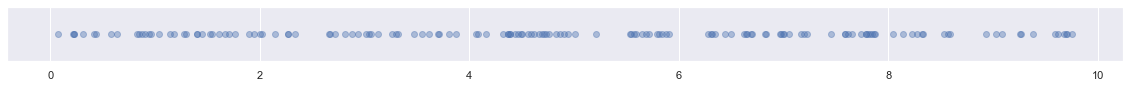

In [3]:
plt.figure(figsize=(20, 1), frameon=False)
plt.yticks([], [])
plt.scatter(x, np.zeros_like(x), alpha=0.4);

In [4]:
def lin(x):
    return 0.85 * x - 1.5

In [5]:
def fun(x):
    return 2 * np.sin(x) + 0.1 * x ** 2 - 2

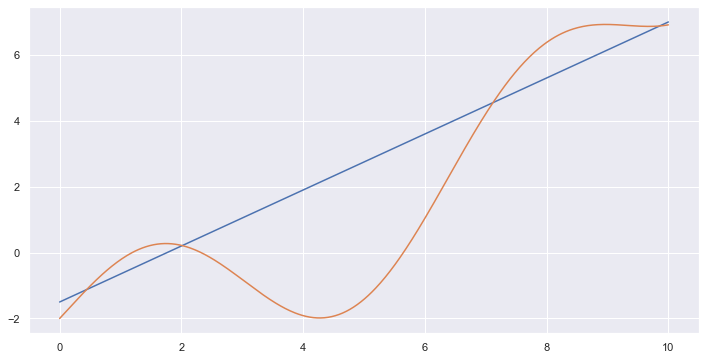

In [6]:
x_plot = np.linspace(0, 10, 500)
plt.figure(figsize=(12, 6))
sns.lineplot(x=x_plot, y=lin(x_plot))
sns.lineplot(x=x_plot, y=fun(x_plot));

In [7]:
def randomize(fun, x, scale=0.5):
    return fun(x) + rng.normal(size=x.shape, scale=scale)

In [8]:
x_train, x_test = x[:100], x[100:]

In [9]:
y_lin_train = lin(x_train).reshape(-1)
y_lin_test = lin(x_test).reshape(-1)
y_fun_train = fun(x_train.reshape(-1))
y_fun_test = fun(x_test).reshape(-1)

In [10]:
y_rand_lin_train = randomize(lin, x_train).reshape(-1)
y_rand_lin_test = randomize(lin, x_test).reshape(-1)
y_rand_fun_train = randomize(fun, x_train.reshape(-1))
y_rand_fun_test = randomize(fun, x_test).reshape(-1)

In [11]:
y_chaos_lin_train = randomize(lin, x_train, 1.5).reshape(-1)
y_chaos_lin_test = randomize(lin, x_test, 1.5).reshape(-1)
y_chaos_fun_train = randomize(fun, x_train, 1.5).reshape(-1)
y_chaos_fun_test = randomize(fun, x_test, 1.5).reshape(-1)

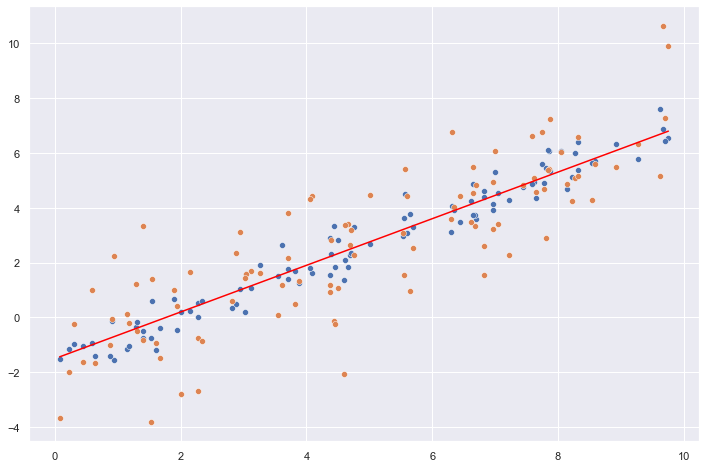

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=x_train[:, 0], y=y_lin_train, color="red", ax=ax)
sns.scatterplot(x=x_train[:, 0], y=y_rand_lin_train, ax=ax)
sns.scatterplot(x=x_train[:, 0], y=y_chaos_lin_train, ax=ax);

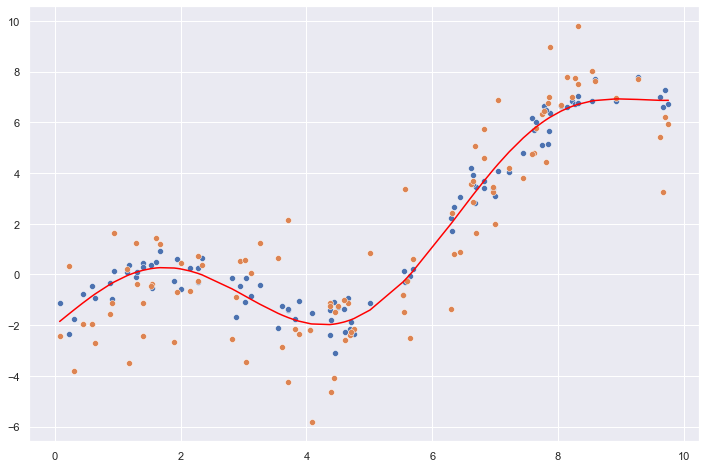

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=x_train[:, 0], y=y_fun_train, color="red", ax=ax)
sns.scatterplot(x=x_train[:, 0], y=y_rand_fun_train, ax=ax)
sns.scatterplot(x=x_train[:, 0], y=y_chaos_fun_train, ax=ax);


 ## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_lin = LinearRegression()
lr_rand_lin = LinearRegression()
lr_chaos_lin = LinearRegression()

In [16]:
lr_lin.fit(x_train, y_lin_train)
lr_rand_lin.fit(x_train, y_rand_lin_train)
lr_chaos_lin.fit(x_train, y_chaos_lin_train);

In [17]:
print("lr_lin", lr_lin.coef_, lr_lin.intercept_)
print("lr_rand_lin", lr_rand_lin.coef_, lr_rand_lin.intercept_)
print("lr_chaos_lin", lr_chaos_lin.coef_, lr_chaos_lin.intercept_)

lr_lin [0.85] -1.4999999999999996
lr_rand_lin [0.87840412] -1.6636713907398777
lr_chaos_lin [0.86418078] -1.5745503093327176


In [18]:
y_lr_lin_pred = lr_lin.predict(x_test)
y_lr_rand_lin_pred = lr_rand_lin.predict(x_test)
y_lr_chaos_lin_pred = lr_chaos_lin.predict(x_test)

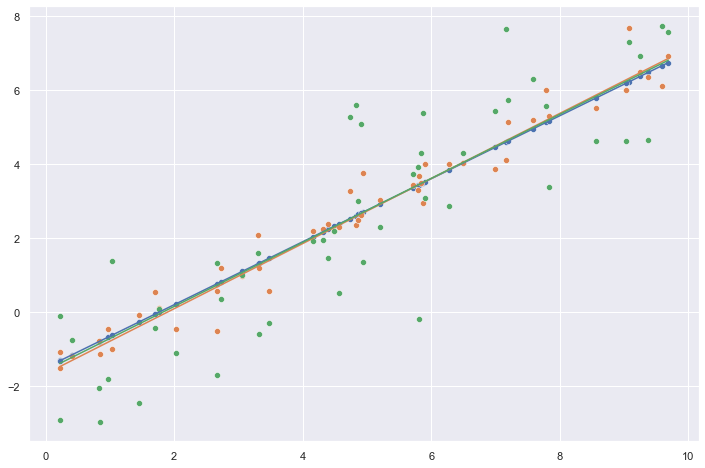

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=x_test[:, 0], y=y_lr_lin_pred, ax=ax)
sns.scatterplot(x=x_test[:, 0], y=y_lin_test, ax=ax)

sns.lineplot(x=x_test[:, 0], y=y_lr_rand_lin_pred, ax=ax)
sns.scatterplot(x=x_test[:, 0], y=y_rand_lin_test, ax=ax)

sns.lineplot(x=x_test[:, 0], y=y_lr_chaos_lin_pred, ax=ax)
sns.scatterplot(x=x_test[:, 0], y=y_chaos_lin_test, ax=ax);

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
mae_lin = mean_absolute_error(y_lin_test, y_lr_lin_pred)
mae_rand_lin = mean_absolute_error(y_rand_lin_test, y_lr_rand_lin_pred)
mae_chaos_lin = mean_absolute_error(y_chaos_lin_test, y_lr_chaos_lin_pred)

mse_lin = mean_squared_error(y_lin_test, y_lr_lin_pred)
mse_rand_lin = mean_squared_error(y_rand_lin_test, y_lr_rand_lin_pred)
mse_chaos_lin = mean_squared_error(y_chaos_lin_test, y_lr_chaos_lin_pred)

rmse_lin = np.sqrt(mean_squared_error(y_lin_test, y_lr_lin_pred))
rmse_rand_lin = np.sqrt(mean_squared_error(y_rand_lin_test, y_lr_rand_lin_pred))
rmse_chaos_lin = np.sqrt(mean_squared_error(y_chaos_lin_test, y_lr_chaos_lin_pred))

print(
    "No randomness:      "
    f"MAE = {mae_lin:.2f}, MSE = {mse_lin:.2f}, RMSE = {rmse_lin:.2f}"
)
print(
    "Some randomness:    "
    f"MAE = {mae_rand_lin:.2f}, MSE = {mse_rand_lin:.2f}, RMSE = {rmse_rand_lin:.2f}"
)
print(
    "Lots of randomness: "
    f"MAE = {mae_chaos_lin:.2f}, MSE = {mse_chaos_lin:.2f}, RMSE = {rmse_chaos_lin:.2f}"
)

No randomness:      MAE = 0.00, MSE = 0.00, RMSE = 0.00
Some randomness:    MAE = 0.34, MSE = 0.22, RMSE = 0.47
Lots of randomness: MAE = 1.20, MSE = 2.19, RMSE = 1.48



 ## Defining an Evaluation Function

In [22]:
def evaluate_non_random_regressor(reg_type, f_y, *args, **kwargs):
    reg = reg_type(*args, **kwargs)

    y_train = f_y(x_train).reshape(-1)
    y_test = f_y(x_test).reshape(-1)

    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)

    x_plot = np.linspace(0, 10, 500).reshape(-1, 1)
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x=x_plot[:, 0], y=reg.predict(x_plot), ax=ax)
    sns.lineplot(x=x_plot[:, 0], y=f_y(x_plot[:, 0]), ax=ax)
    sns.scatterplot(x=x_train[:, 0], y=y_train, ax=ax)
    plt.show()

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(
        "\nNo randomness:      " f"MAE = {mae:.2f}, MSE = {mse:.2f}, RMSE = {rmse:.2f}"
    )

    return reg

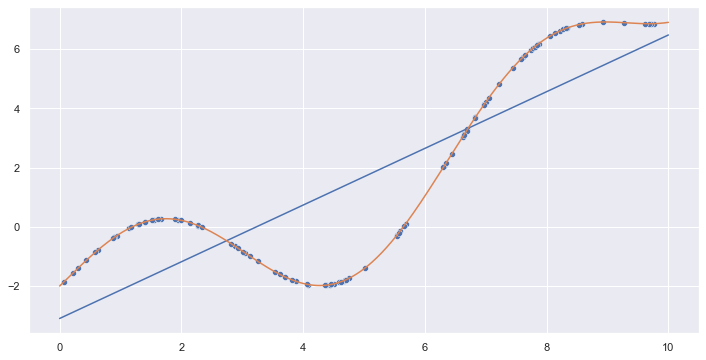


No randomness:      MAE = 1.73, MSE = 3.78, RMSE = 1.94


In [23]:
evaluate_non_random_regressor(LinearRegression, fun);

### Underfitting
 
Underfitting occurs when the model is not able to fit the training data.

In [24]:
def plot_graphs(f_y, reg, reg_rand, reg_chaos, y_train, y_rand_test, y_chaos_test):
    x_plot = np.linspace(0, 10, 500).reshape(-1, 1)
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=x_plot[:, 0], y=reg.predict(x_plot), ax=ax)
    sns.scatterplot(x=x_train[:, 0], y=y_train, ax=ax)

    sns.lineplot(x=x_plot[:, 0], y=reg_rand.predict(x_plot), ax=ax)
    sns.scatterplot(x=x_test[:, 0], y=y_rand_test, ax=ax)

    sns.lineplot(x=x_plot[:, 0], y=reg_chaos.predict(x_plot), ax=ax)
    sns.scatterplot(x=x_test[:, 0], y=y_chaos_test, ax=ax)

    sns.lineplot(x=x_plot[:, 0], y=f_y(x_plot[:, 0]), ax=ax)
    plt.show()   

In [25]:
def print_evaluation(y_test, y_pred, y_rand_test, y_rand_pred, y_chaos_test, y_chaos_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mae_rand = mean_absolute_error(y_rand_test, y_rand_pred)
    mae_chaos = mean_absolute_error(y_chaos_test, y_chaos_pred)

    mse = mean_squared_error(y_test, y_pred)
    mse_rand = mean_squared_error(y_rand_test, y_rand_pred)
    mse_chaos = mean_squared_error(y_chaos_test, y_chaos_pred)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_rand = np.sqrt(mean_squared_error(y_rand_test, y_rand_pred))
    rmse_chaos = np.sqrt(mean_squared_error(y_chaos_test, y_chaos_pred))

    print(
        "\nNo randomness:      " f"MAE = {mae:.2f}, MSE = {mse:.2f}, RMSE = {rmse:.2f}"
    )
    print(
        "Some randomness:    "
        f"MAE = {mae_rand:.2f}, MSE = {mse_rand:.2f}, RMSE = {rmse_rand:.2f}"
    )
    print(
        "Lots of randomness: "
        f"MAE = {mae_chaos:.2f}, MSE = {mse_chaos:.2f}, RMSE = {rmse_chaos:.2f}"
    )

In [26]:
def evaluate_regressor(reg_type, f_y, *args, **kwargs):
    reg = reg_type(*args, **kwargs)
    reg_rand = reg_type(*args, **kwargs)
    reg_chaos = reg_type(*args, **kwargs)
    
    y_train = f_y(x_train).reshape(-1)
    y_test = f_y(x_test).reshape(-1)
    y_pred = reg.fit(x_train, y_train).predict(x_test)
    
    y_rand_train = randomize(f_y, x_train).reshape(-1)
    y_rand_test = randomize(f_y, x_test).reshape(-1)
    y_rand_pred = reg_rand.fit(x_train, y_rand_train).predict(x_test)

    y_chaos_train = randomize(f_y, x_train, 1.5).reshape(-1)
    y_chaos_test = randomize(f_y, x_test, 1.5).reshape(-1)
    y_chaos_pred = reg_chaos.fit(x_train, y_chaos_train).predict(x_test)

    plot_graphs(f_y, reg, reg_rand, reg_chaos, y_train, y_rand_test, y_chaos_test)
    print_evaluation(y_test, y_pred, y_rand_test, y_rand_pred, y_chaos_test, y_chaos_pred)

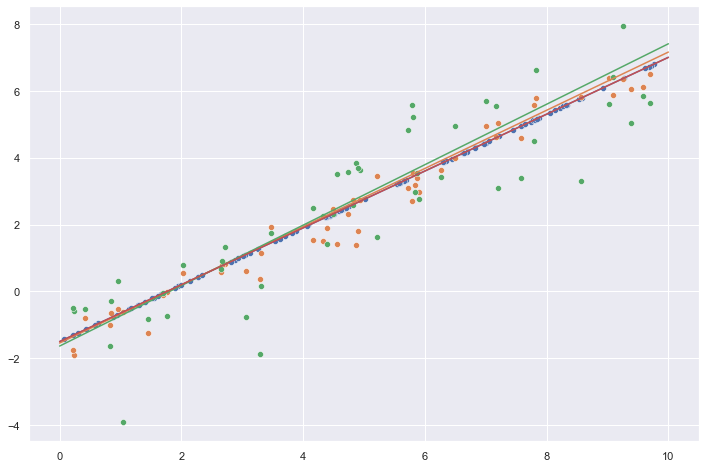


No randomness:      MAE = 0.00, MSE = 0.00, RMSE = 0.00
Some randomness:    MAE = 0.37, MSE = 0.23, RMSE = 0.48
Lots of randomness: MAE = 1.00, MSE = 1.53, RMSE = 1.24


In [27]:
evaluate_regressor(LinearRegression, lin)

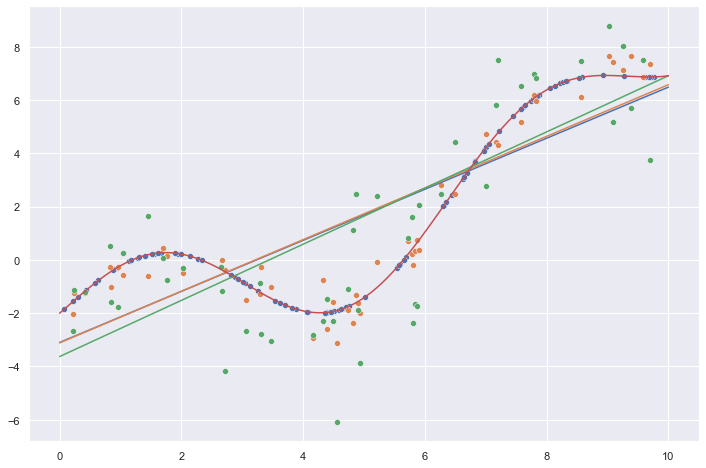


No randomness:      MAE = 1.73, MSE = 3.78, RMSE = 1.94
Some randomness:    MAE = 1.73, MSE = 4.10, RMSE = 2.02
Lots of randomness: MAE = 2.21, MSE = 7.00, RMSE = 2.65


In [28]:
evaluate_regressor(LinearRegression, fun)

## Stochastic Gradient Descent

In [29]:
from sklearn.linear_model import SGDRegressor

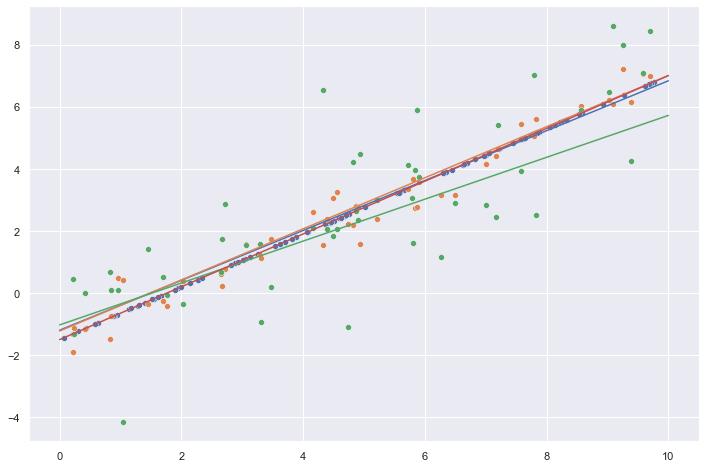


No randomness:      MAE = 0.12, MSE = 0.02, RMSE = 0.15
Some randomness:    MAE = 0.43, MSE = 0.28, RMSE = 0.53
Lots of randomness: MAE = 1.30, MSE = 2.88, RMSE = 1.70


In [30]:
evaluate_regressor(SGDRegressor, lin)

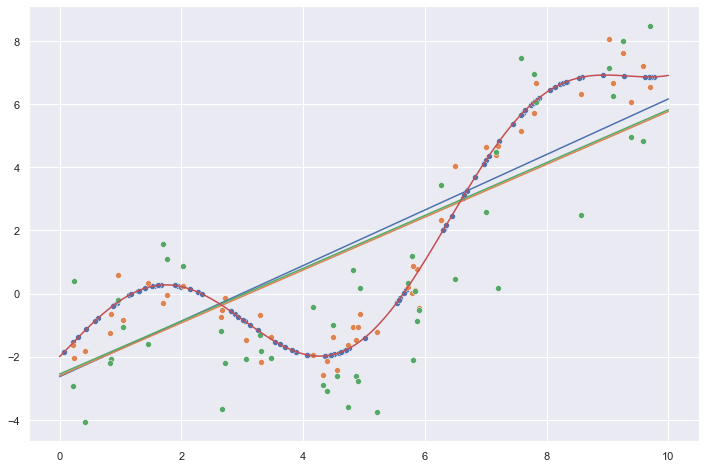


No randomness:      MAE = 1.74, MSE = 3.84, RMSE = 1.96
Some randomness:    MAE = 1.73, MSE = 3.86, RMSE = 1.96
Lots of randomness: MAE = 2.21, MSE = 6.66, RMSE = 2.58


In [31]:
evaluate_regressor(SGDRegressor, fun)

### Unnormalized Data
 
Stochastic gradient descent can sometimes run into trouble when different features are of different magnitudes.

## Nearest Neighbors

<img src="img/KnnClassification.svg" style="width: 40%; margin-left: auto; margin-right: auto;"/>

In [32]:
from sklearn.neighbors import KNeighborsRegressor

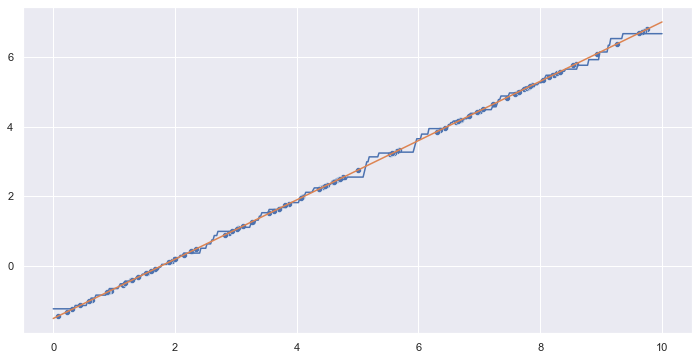


No randomness:      MAE = 0.08, MSE = 0.01, RMSE = 0.11


In [33]:
evaluate_non_random_regressor(KNeighborsRegressor, lin);

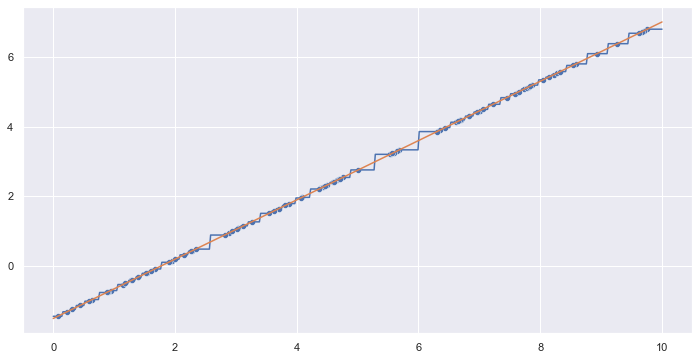


No randomness:      MAE = 0.05, MSE = 0.01, RMSE = 0.07


In [34]:
evaluate_non_random_regressor(KNeighborsRegressor, lin, n_neighbors=1);

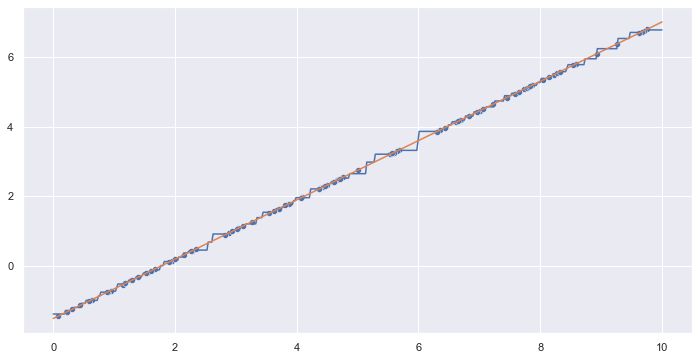


No randomness:      MAE = 0.06, MSE = 0.01, RMSE = 0.07


In [35]:
evaluate_non_random_regressor(KNeighborsRegressor, lin, n_neighbors=2);

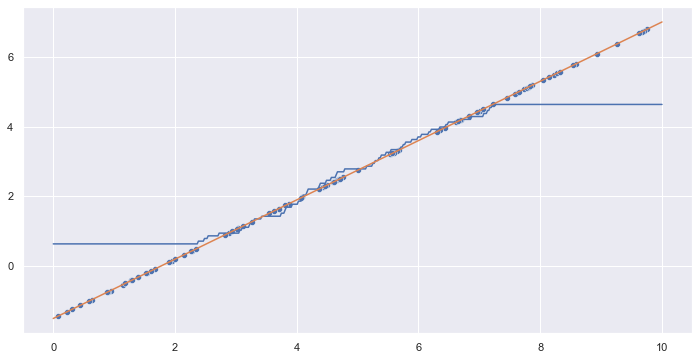


No randomness:      MAE = 0.60, MSE = 0.84, RMSE = 0.92


In [36]:
evaluate_non_random_regressor(KNeighborsRegressor, lin, n_neighbors=50);

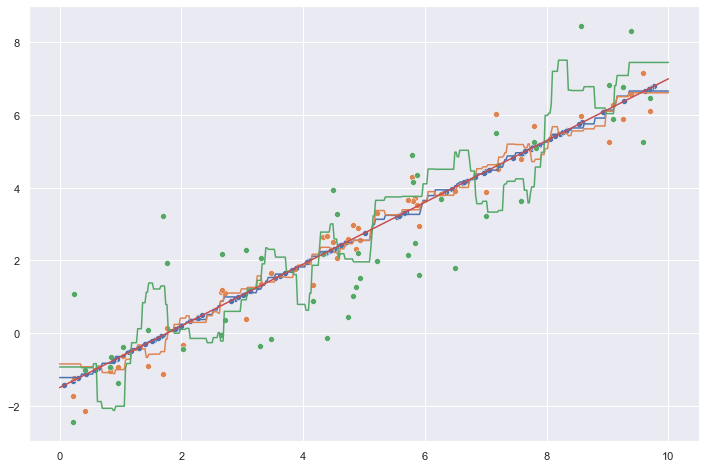


No randomness:      MAE = 0.08, MSE = 0.01, RMSE = 0.11
Some randomness:    MAE = 0.39, MSE = 0.25, RMSE = 0.50
Lots of randomness: MAE = 1.17, MSE = 1.91, RMSE = 1.38


In [37]:
evaluate_regressor(KNeighborsRegressor, lin)

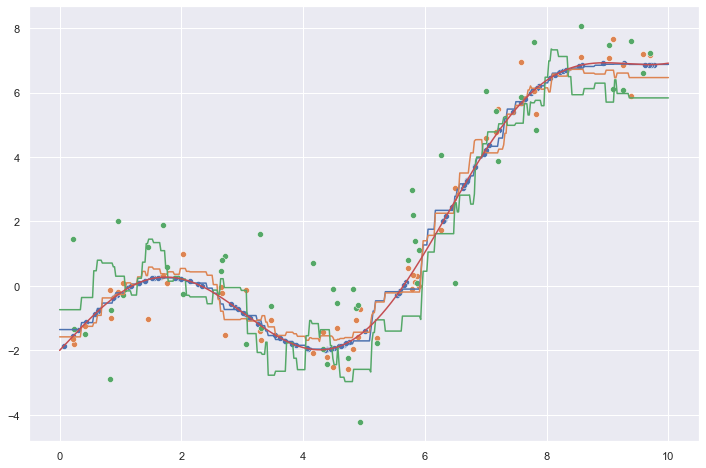


No randomness:      MAE = 0.17, MSE = 0.07, RMSE = 0.27
Some randomness:    MAE = 0.52, MSE = 0.39, RMSE = 0.62
Lots of randomness: MAE = 1.47, MSE = 3.02, RMSE = 1.74


In [38]:
evaluate_regressor(KNeighborsRegressor, fun)

## Decision Trees

## Training Decision Trees

- (Conceptually) build a nested `if`-`then`-`else` statement 
- Each test compares one feature against a value
- Minimize some *loss function* (e.g., mean squared error)

```python
if feature_1 < 1.2:
    if feature_2 < 3.0:
        if feature_1 < 0.2:
            return 25_324
        else:
            return 17_145
    else:
        ...
else:
    ...
```

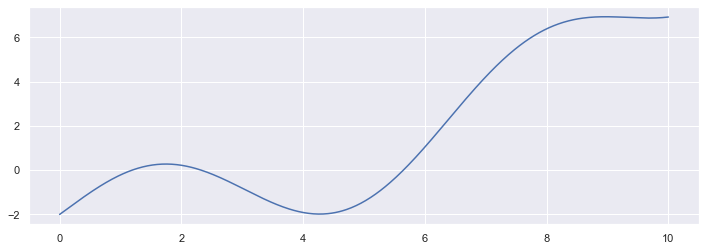

In [39]:
x_plot = np.linspace(0, 10, 500)
plt.figure(figsize=(12, 4))
sns.lineplot(x=x_plot, y=fun(x_plot));

In [40]:
from sklearn.metrics import mean_squared_error
x_plot = np.linspace(0, 10, 500)
y_plot = np.ones_like(x_plot) * 1.5
print(mean_squared_error(fun(x_plot), y_plot))

11.044163958007436


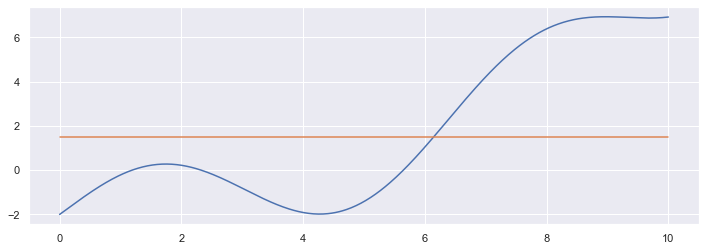

In [41]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=x_plot, y=fun(x_plot))
sns.lineplot(x=x_plot, y=y_plot);

In [42]:
def approx(x):
    if x < 6.2:
        return -0.5
    else:
        return 5.5

In [43]:
approx(4), approx(8)

(-0.5, 5.5)

In [44]:
list(map(approx, np.arange(4, 10)))

[-0.5, -0.5, -0.5, 5.5, 5.5, 5.5]

In [45]:
x_plot = np.linspace(0, 10, 500)
y_plot = list(map(approx, x_plot))
print(mean_squared_error(fun(x_plot), y_plot))

1.4757448667093518


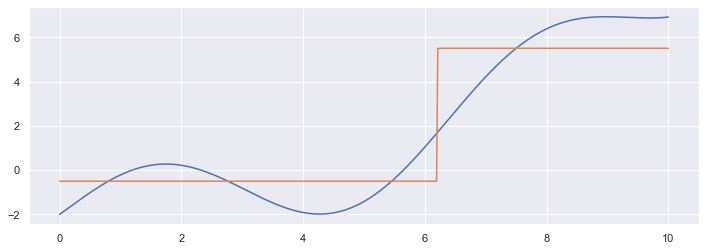

In [46]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=x_plot, y=fun(x_plot))
sns.lineplot(x=x_plot, y=y_plot);

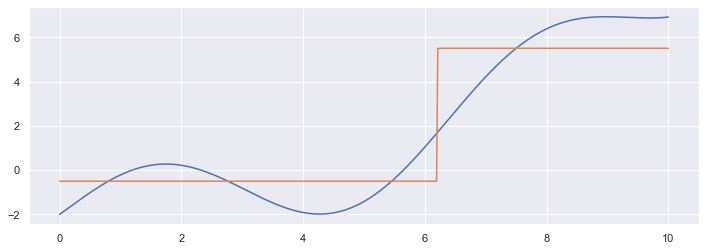

In [47]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=x_plot, y=fun(x_plot));
sns.lineplot(x=x_plot, y=np.select([x_plot<6.2, x_plot>=6.2], [-0.5, 5.5]));

## Advantages

- Simple to understand and visualize
- Interpretable
- Good for analyzing the dataset (e.g., feature importances, ...)
- Robust to statistical variations in the data
- Needs little data preparation (not sensitive to mean or standard deviation of features, ...)

## Disadvantages

- Very prone to overfitting
- Sensitive to unbalanced data sets
- Only discrete predictions with axis-aligned boundaries
- Unstable when training data changes (tree may change completely when a single item is added)

In [48]:
from sklearn.tree import DecisionTreeRegressor

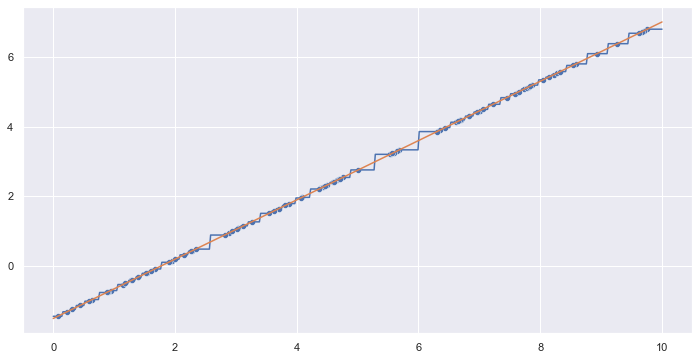


No randomness:      MAE = 0.05, MSE = 0.01, RMSE = 0.07


In [49]:
evaluate_non_random_regressor(DecisionTreeRegressor, lin);

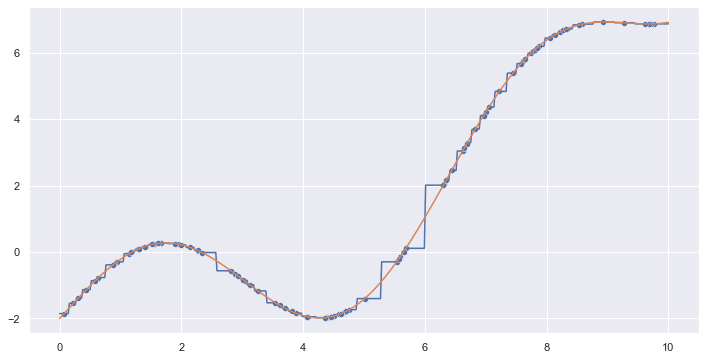


No randomness:      MAE = 0.10, MSE = 0.03, RMSE = 0.17


In [50]:
evaluate_non_random_regressor(DecisionTreeRegressor, fun);

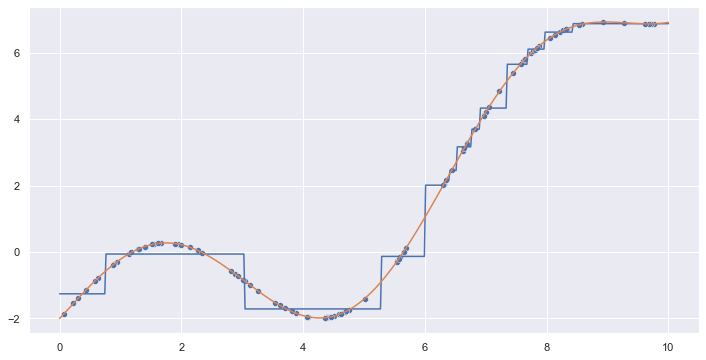


No randomness:      MAE = 0.27, MSE = 0.13, RMSE = 0.35


In [51]:
evaluate_non_random_regressor(DecisionTreeRegressor, fun, max_depth=4);

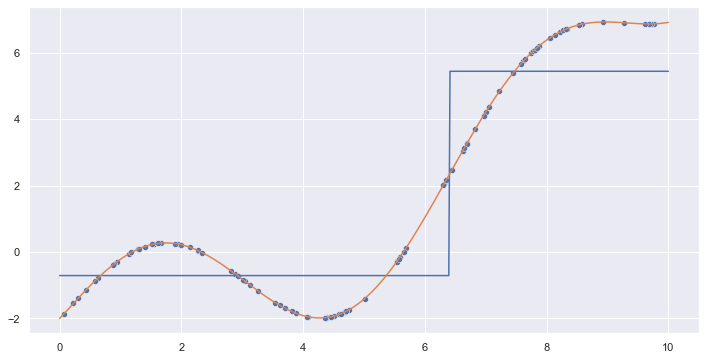


No randomness:      MAE = 0.97, MSE = 1.22, RMSE = 1.11


In [52]:
dt1 = evaluate_non_random_regressor(DecisionTreeRegressor, fun, max_depth=1);

In [53]:
from sklearn.tree import plot_tree;

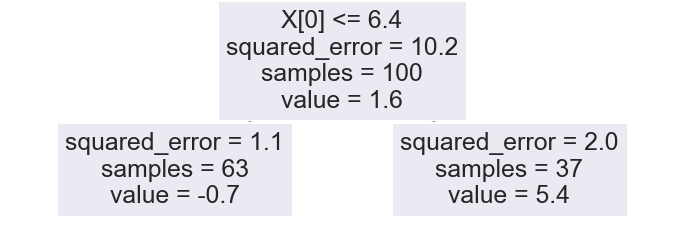

In [54]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_tree(dt1, ax=ax, precision=1);

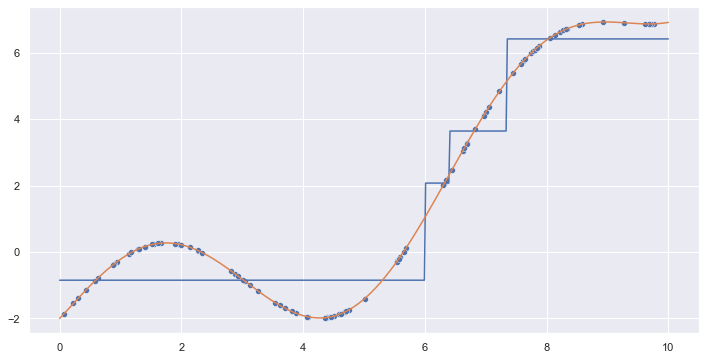


No randomness:      MAE = 0.74, MSE = 0.69, RMSE = 0.83


In [55]:
dt2 = evaluate_non_random_regressor(DecisionTreeRegressor, fun, max_depth=2);

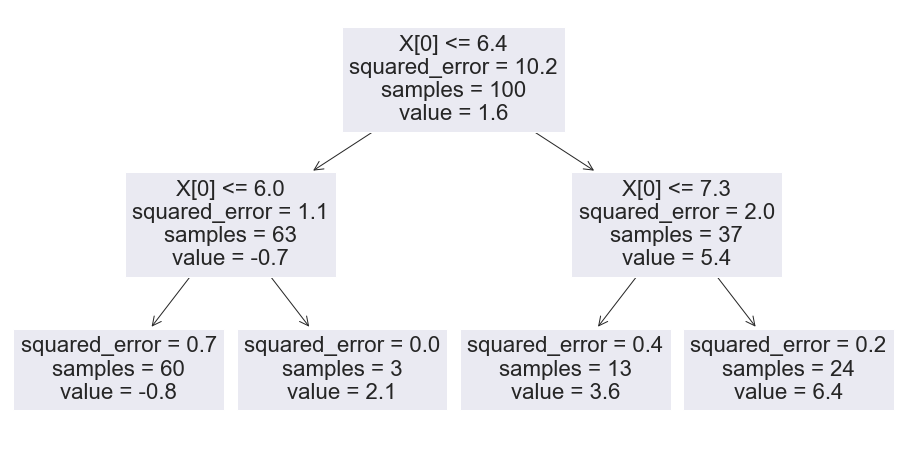

In [56]:
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(dt2, ax=ax, precision=1);

In [57]:
def plot_regressions(regressors, f_y):
    y_train = f_y(x_train).reshape(-1)

    x_plot = np.linspace(0, 10, 500).reshape(-1, 1)
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x=x_plot[:, 0], y=f_y(x_plot[:, 0]), ax=ax)
    sns.scatterplot(x=x_train[:, 0], y=y_train, ax=ax)
    for reg in regressors:
        sns.lineplot(x=x_plot[:, 0], y=reg.predict(x_plot), ax=ax)
    plt.show()

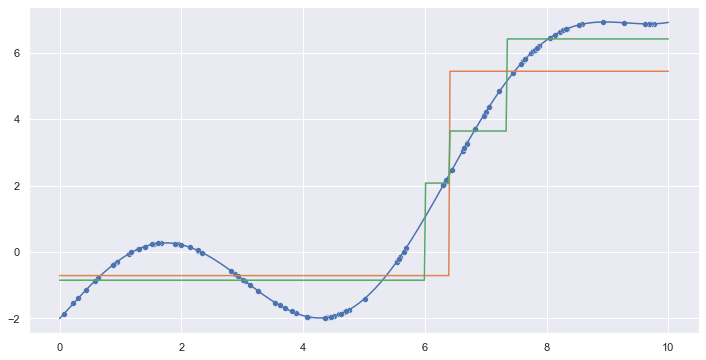

In [58]:
plot_regressions([dt1, dt2], fun);

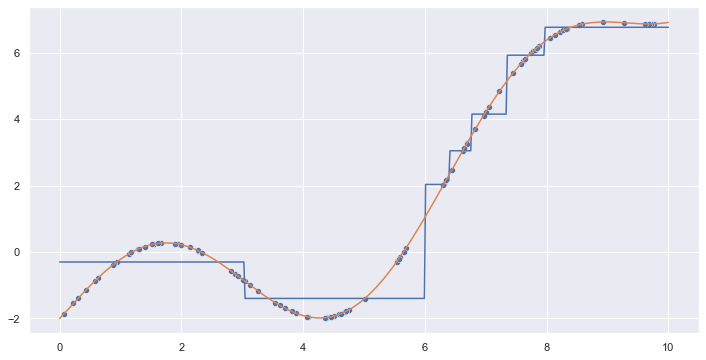


No randomness:      MAE = 0.52, MSE = 0.61, RMSE = 0.78


In [59]:
dt3 = evaluate_non_random_regressor(DecisionTreeRegressor, fun, max_depth=3);

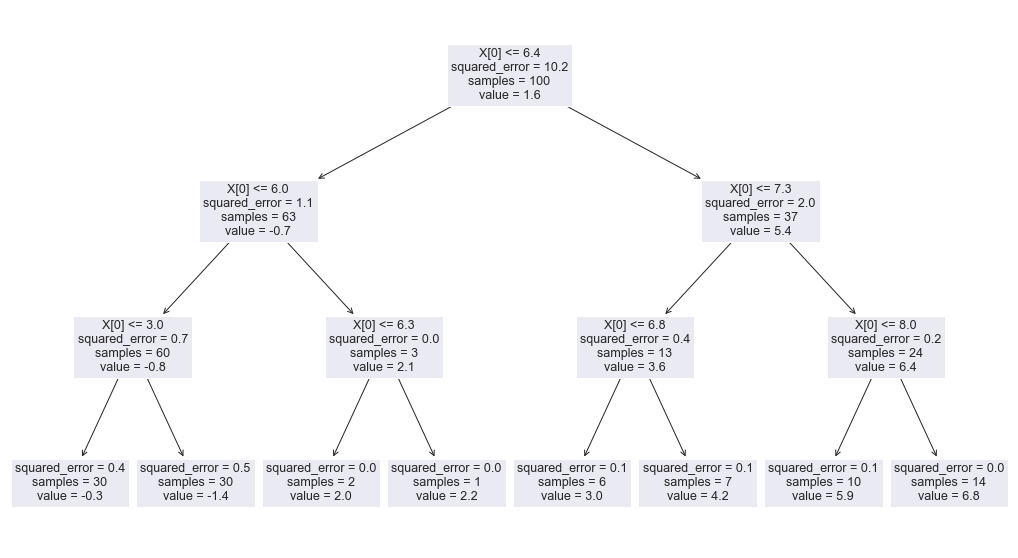

In [60]:
fig, ax = plt.subplots(figsize=(18, 10))
plot_tree(dt3, ax=ax, precision=1);

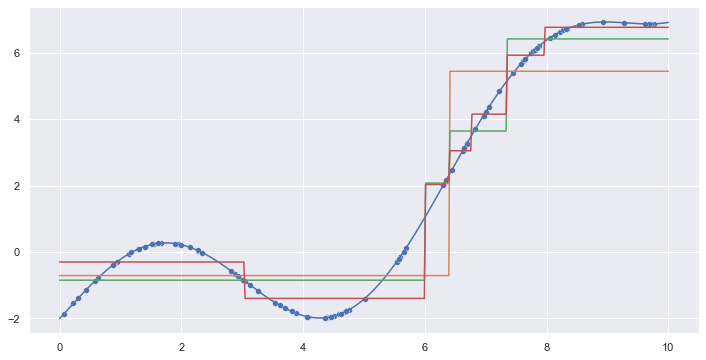

In [61]:
plot_regressions([dt1, dt2, dt3], fun);

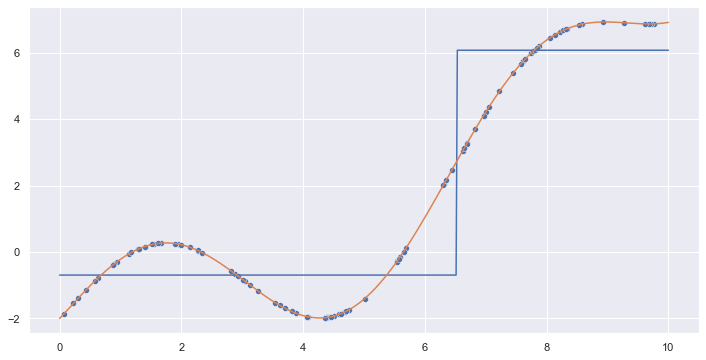


No randomness:      MAE = 0.91, MSE = 1.17, RMSE = 1.08


In [62]:
dt1_mae = evaluate_non_random_regressor(
    DecisionTreeRegressor, fun, max_depth=1, criterion="absolute_error"
)

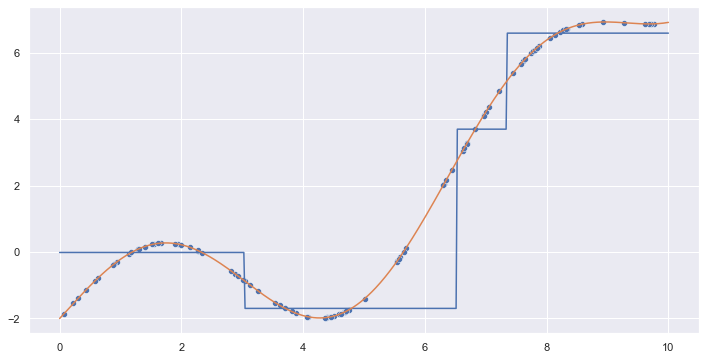


No randomness:      MAE = 0.80, MSE = 1.50, RMSE = 1.22


In [63]:
dt2_mae = evaluate_non_random_regressor(
    DecisionTreeRegressor, fun, max_depth=2, criterion="absolute_error"
)

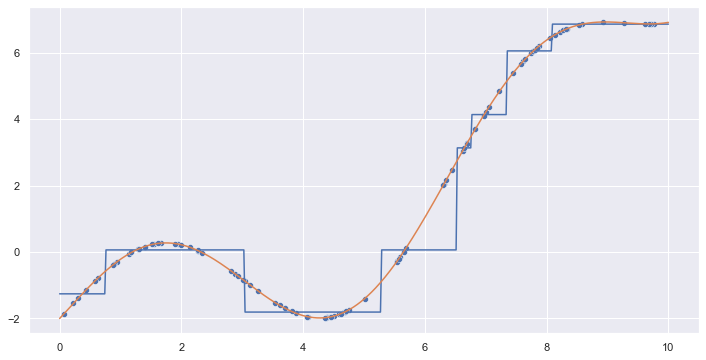


No randomness:      MAE = 0.36, MSE = 0.33, RMSE = 0.57


In [64]:
dt3_mae = evaluate_non_random_regressor(
    DecisionTreeRegressor, fun, max_depth=3, criterion="absolute_error"
);

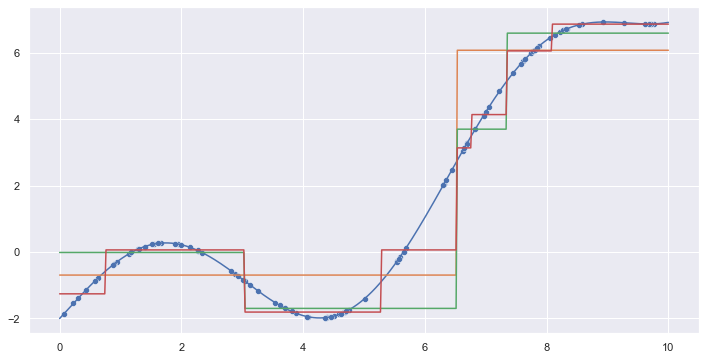

In [65]:
plot_regressions([dt1_mae, dt2_mae, dt3_mae], fun)

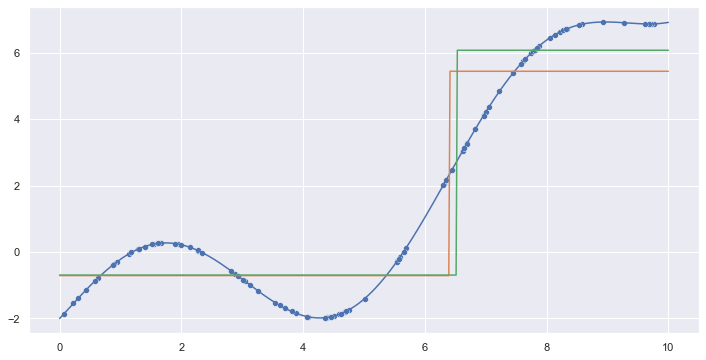

In [66]:
plot_regressions([dt1, dt1_mae], fun)

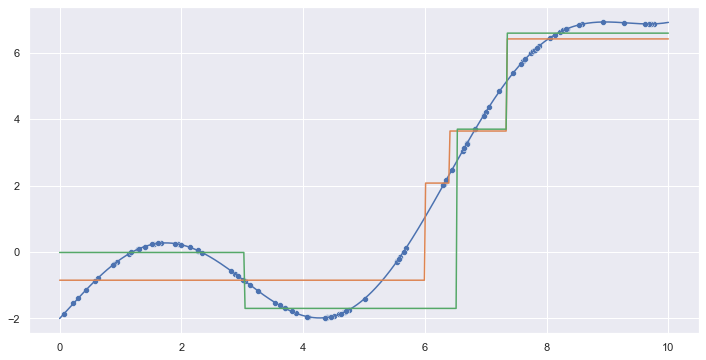

In [67]:
plot_regressions([dt2, dt2_mae], fun)

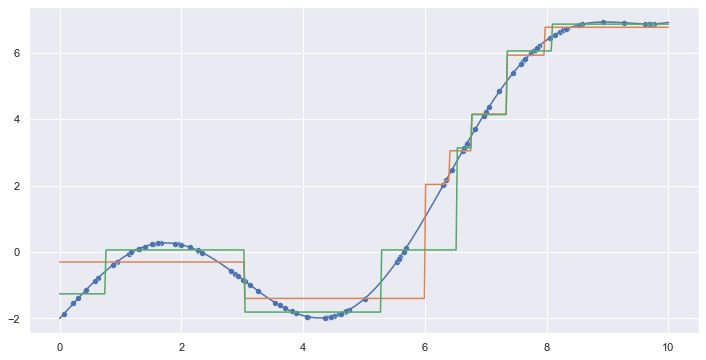

In [68]:
plot_regressions([dt3, dt3_mae], fun)

In [69]:
def plot_graphs(f_y, reg, reg_rand, reg_chaos, y_train, y_rand_train, y_chaos_train):
    x_plot = np.linspace(0, 10, 500).reshape(-1, 1)
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=x_plot[:, 0], y=reg.predict(x_plot), ax=ax)
    sns.scatterplot(x=x_train[:, 0], y=y_train, ax=ax)

    sns.lineplot(x=x_plot[:, 0], y=reg_rand.predict(x_plot), ax=ax)
    sns.scatterplot(x=x_train[:, 0], y=y_rand_train, ax=ax)

    sns.lineplot(x=x_plot[:, 0], y=reg_chaos.predict(x_plot), ax=ax)
    sns.scatterplot(x=x_train[:, 0], y=y_chaos_train, ax=ax)

    sns.lineplot(x=x_plot[:, 0], y=f_y(x_plot[:, 0]), ax=ax)
    plt.show()   

In [70]:
def evaluate_regressor(reg_type, f_y, *args, **kwargs):
    reg = reg_type(*args, **kwargs)
    reg_rand = reg_type(*args, **kwargs)
    reg_chaos = reg_type(*args, **kwargs)
    
    y_train = f_y(x_train).reshape(-1)
    y_test = f_y(x_test).reshape(-1)
    y_pred = reg.fit(x_train, y_train).predict(x_test)
    
    y_rand_train = randomize(f_y, x_train).reshape(-1)
    y_rand_test = randomize(f_y, x_test).reshape(-1)
    y_rand_pred = reg_rand.fit(x_train, y_rand_train).predict(x_test)

    y_chaos_train = randomize(f_y, x_train, 1.5).reshape(-1)
    y_chaos_test = randomize(f_y, x_test, 1.5).reshape(-1)
    y_chaos_pred = reg_chaos.fit(x_train, y_chaos_train).predict(x_test)

    plot_graphs(f_y, reg, reg_rand, reg_chaos, y_train, y_rand_train, y_chaos_train)
    print_evaluation(y_test, y_pred, y_rand_test, y_rand_pred, y_chaos_test, y_chaos_pred)

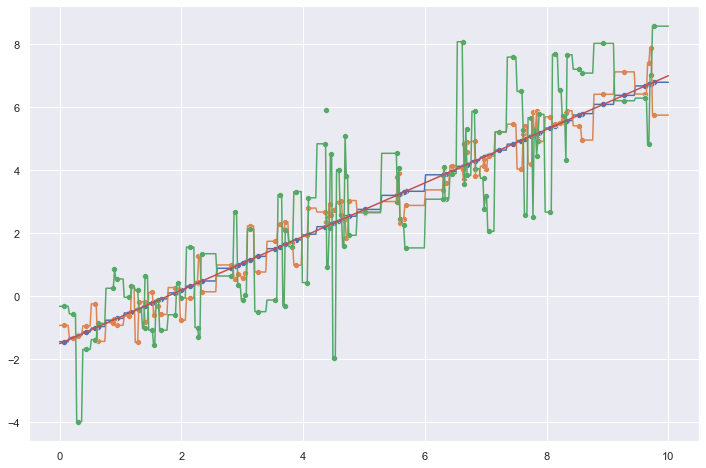


No randomness:      MAE = 0.05, MSE = 0.01, RMSE = 0.07
Some randomness:    MAE = 0.60, MSE = 0.57, RMSE = 0.75
Lots of randomness: MAE = 1.74, MSE = 4.63, RMSE = 2.15


In [71]:
evaluate_regressor(DecisionTreeRegressor, lin)

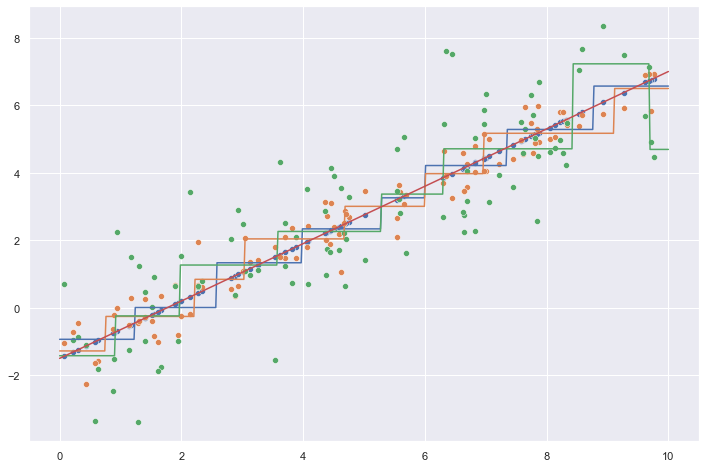


No randomness:      MAE = 0.24, MSE = 0.08, RMSE = 0.29
Some randomness:    MAE = 0.59, MSE = 0.56, RMSE = 0.75
Lots of randomness: MAE = 1.16, MSE = 2.15, RMSE = 1.47


In [72]:
evaluate_regressor(DecisionTreeRegressor, lin, max_depth=3)

# Overfitting and Underfitting
 
Overfitting occurs when the model matches noise in the training data.

Underfitting occurs when the model cannot match the training data set.

## Bias/Variance Tradeoff

**Bias error:** Error from bad assumptions in our model or learning algorithm about the structure of our solution. Leads to underfitting.

**Variance:** Reaction to small fluctuations in the training data. Leads to overfitting.

"\[B\]ias measures the tendency of a system to consistently learn the  wrong things, and variance measures its tendency to learn irrelevant  details" 

-- Pedro Domingos


### Bias/Variance Tradeoff

<img src="img/low-bias-low-variance.png" style="width: 22%; display: inline-block;"/>
<img src="img/low-bias-high-variance.png" style="width: 22%; display: inline-block;"/>
<img src="img/high-bias-low-variance.png" style="width: 22%; display: inline-block;"/>
<img src="img/high-bias-high-variance.png" style="width: 22%; display: inline-block;"/>

<img src="img/ag/Figure-09-008.png" style="width: 40%; padding: 20px;"/>

<img src="img/ag/Figure-09-009.png" style="width: 80%; padding: 20px;"/>

<img src="img/ag/Figure-09-010.png" style="width: 40%; padding: 20px;"/>

In [73]:
x = np.linspace(0, 10, 500)
y = randomize(fun, x, 2.0)
lr_reg = LinearRegression().fit(x.reshape(-1, 1), y)
dt_reg = DecisionTreeRegressor().fit(x.reshape(-1, 1), y)

def plot(reg, ax):
    sns.lineplot(x=x, y=fun(x), ax=ax, color="red")
    sns.lineplot(x=x, y=y, ax=ax, alpha=0.5)
    sns.lineplot(x=x, y=reg.predict(x.reshape(-1, 1)), ax=ax);

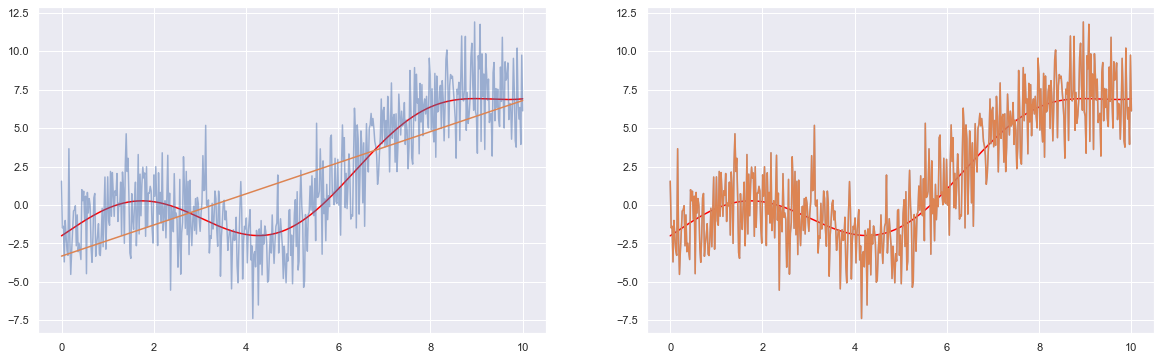

In [74]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
plot(lr_reg, ax[0])
plot(dt_reg, ax[1])

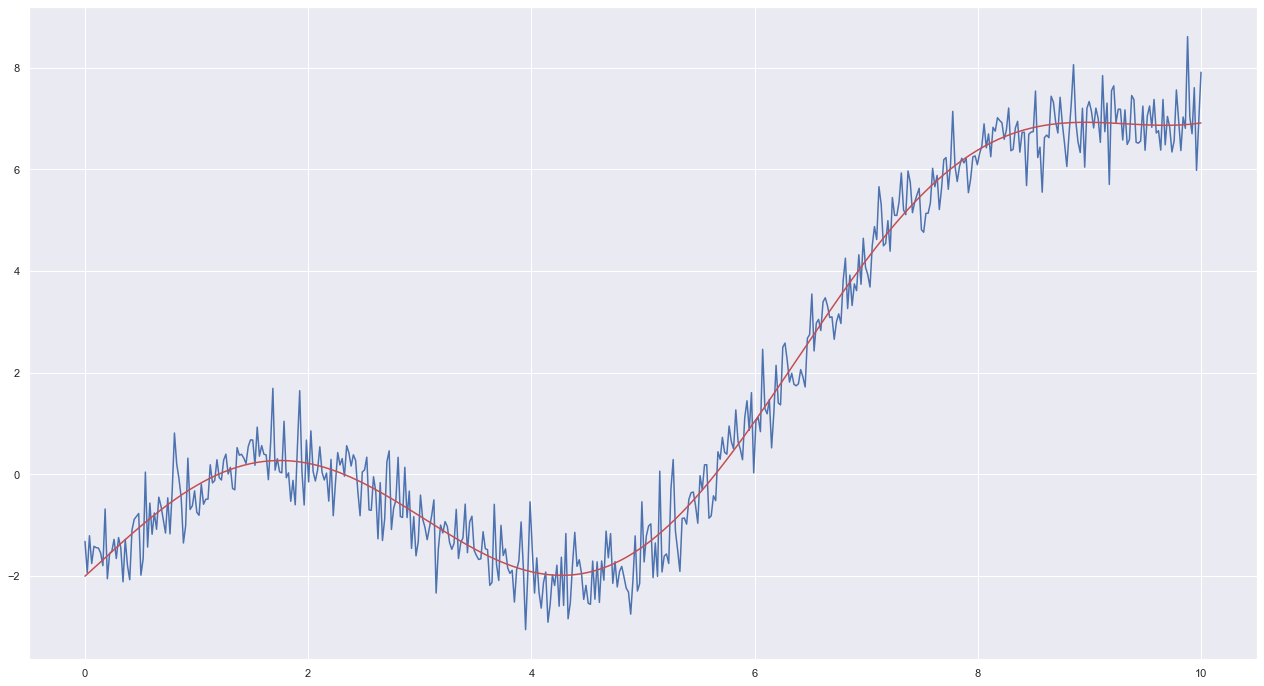

In [75]:
x = np.linspace(0, 10, 500)
fix, ax = plt.subplots(figsize=(22, 12))
# ax.fill_between(x, 1.8 * np.sin(x) + 0.09 * x ** 2 - 5, 2.1 * np.sin(x) + 0.11 * x ** 2 + 1, alpha=0.2)
ax.plot(x, randomize(fun, x, scale=0.5))
ax.plot(x, fun(x), color="r");

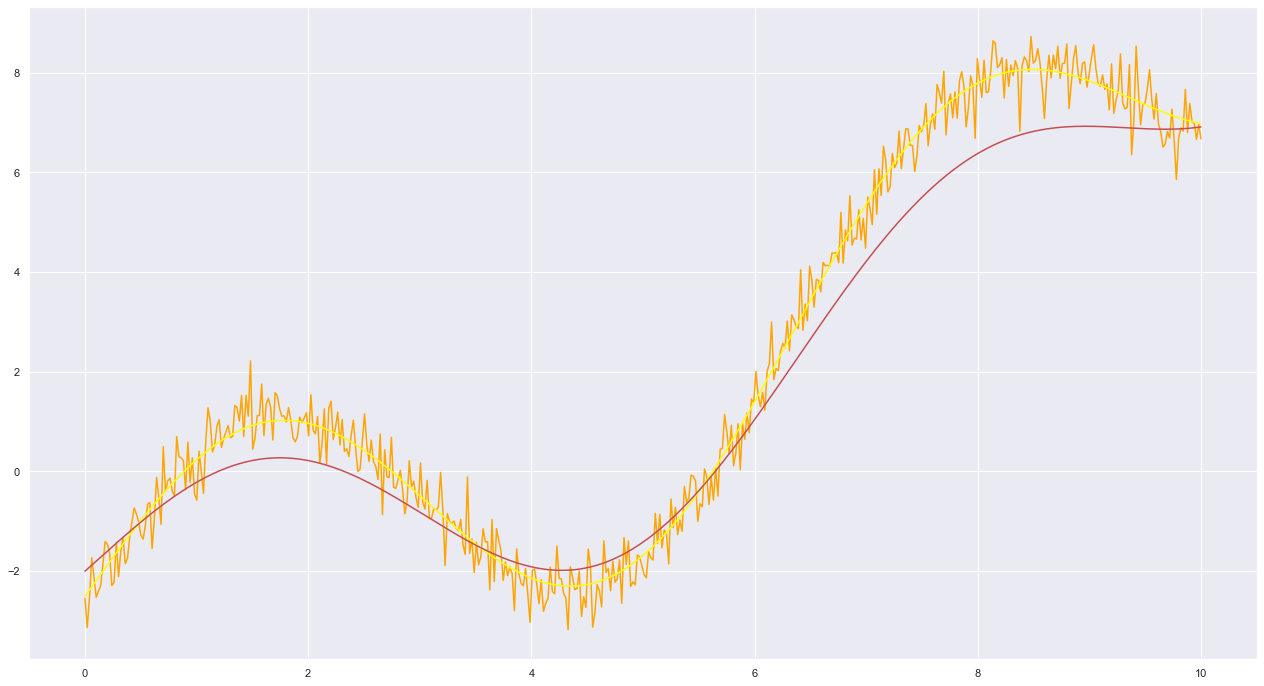

In [76]:
def fun2(x): return 2.8 * np.sin(x) + 0.3 * x + 0.08 * x ** 2 - 2.5
fix, ax = plt.subplots(figsize=(22, 12))
# ax.fill_between(x, 1.8 * np.sin(x) + 0.09 * x ** 2 - 5, 2.1 * np.sin(x) + 0.11 * x ** 2 + 1, alpha=0.2)
ax.plot(x, randomize(fun2, x, scale=0.4), color="orange")
ax.plot(x, fun2(x), color="yellow")
ax.plot(x, fun(x), color="r");

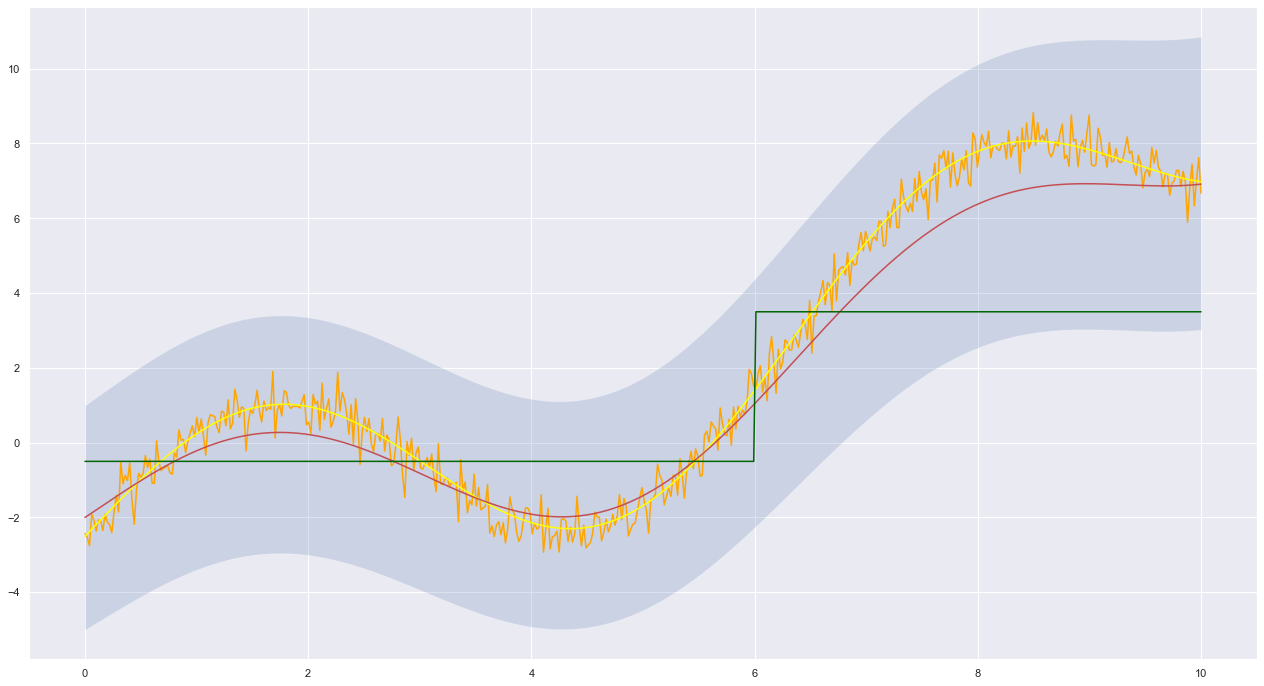

In [77]:
fix, ax = plt.subplots(figsize=(22, 12))
ax.fill_between(x, 1.8 * np.sin(x) + 0.09 * x ** 2 - 5, 2.1 * np.sin(x) + 0.11 * x ** 2 + 1, alpha=0.2)
ax.plot(x, randomize(fun2, x, scale=0.4), color="orange")
# ax.plot(x, randomize(fun, x, scale=0.5))
ax.plot(x, fun2(x), color="yellow")
ax.plot(x, fun(x), color="r")
ax.plot(x, np.select([x<=6, x>6], [-0.5, 3.5]), color="darkgreen");

## Recognizing Overfitting

- Performance on your training set is much better than on your validation/test set

## Reducing Overfitting

- Collect more/different training data
- Perform (better) feature engineering
- Decrease model capacity
- Regularize the model
- Use cross validation
- Augment the training data
- Add batch normalization, dropout, ... layers
- Stop training early
- ...

In [78]:
rng = np.random.default_rng(42)
dt_reg = DecisionTreeRegressor()
x_train = rng.uniform(size=(100, 1), low=0.0, high=10.0)
y_train = randomize(fun, x_train, scale=1.5)
y_test = randomize(fun, x_train, scale=1.5)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [79]:
mae = mean_absolute_error(y_train, dt_reg.predict(x_train))
mse = mean_squared_error(y_train, dt_reg.predict(x_train))
mae, mse

(0.0, 0.0)

In [80]:
mae_test = mean_absolute_error(y_test, dt_reg.predict(x_train))
mse_test = mean_squared_error(y_test, dt_reg.predict(x_train))
mae_test, mse_test

(1.5806173118899007, 4.365264985334807)

In [81]:
fun_mae = mean_absolute_error(y_train, fun(x_train))
fun_mse = mean_squared_error(y_train, fun(x_train))
fun_mae, fun_mse

(1.1898193262971575, 2.1588644498085032)

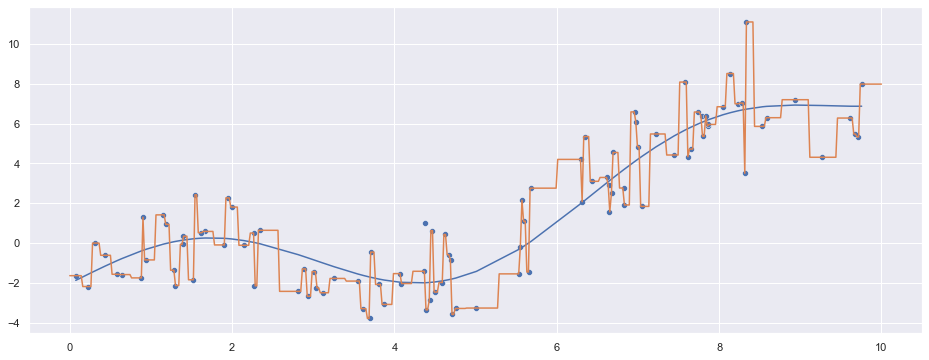

In [82]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=x_train[:, 0], y=fun(x_train)[:, 0])
sns.scatterplot(x=x_train[:, 0], y=y_train[:, 0])
sns.lineplot(x=x_plot, y=dt_reg.predict(x_plot.reshape(-1, 1)));

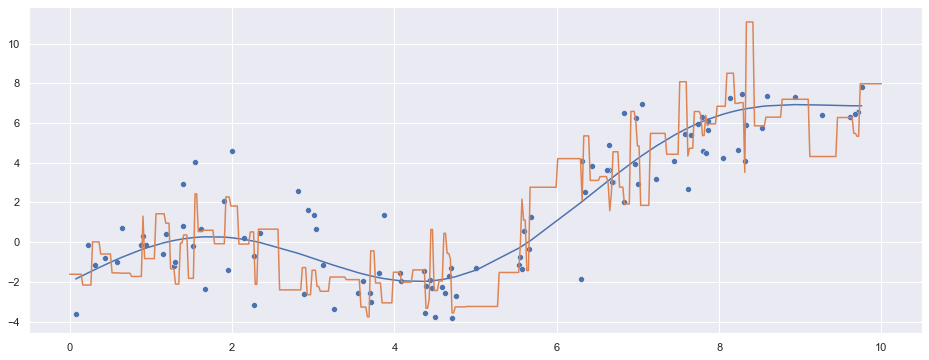

In [83]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=x_train[:, 0], y=fun(x_train)[:, 0])
sns.scatterplot(x=x_train[:, 0], y=y_test[:, 0])
sns.lineplot(x=x_plot, y=dt_reg.predict(x_plot.reshape(-1, 1)));

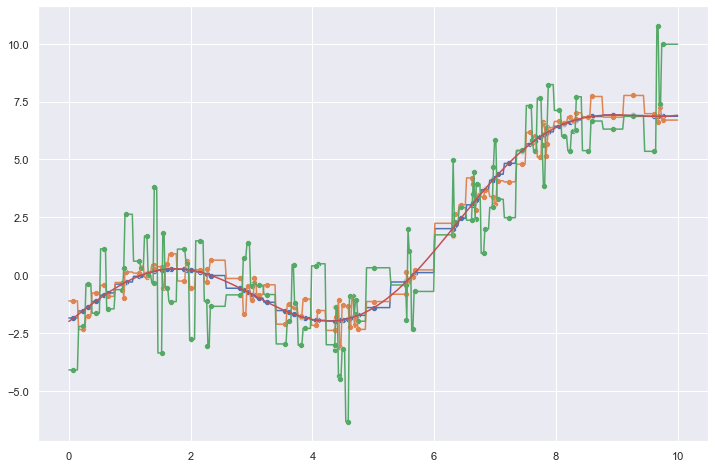


No randomness:      MAE = 0.10, MSE = 0.03, RMSE = 0.17
Some randomness:    MAE = 0.60, MSE = 0.51, RMSE = 0.71
Lots of randomness: MAE = 1.66, MSE = 4.31, RMSE = 2.07


In [84]:
evaluate_regressor(DecisionTreeRegressor, fun)

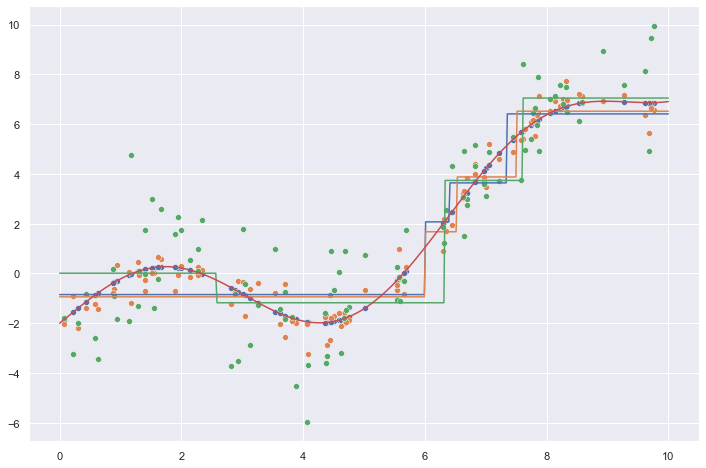


No randomness:      MAE = 0.74, MSE = 0.69, RMSE = 0.83
Some randomness:    MAE = 0.82, MSE = 1.00, RMSE = 1.00
Lots of randomness: MAE = 1.28, MSE = 2.75, RMSE = 1.66


In [85]:
evaluate_regressor(DecisionTreeRegressor, fun, max_depth=2)

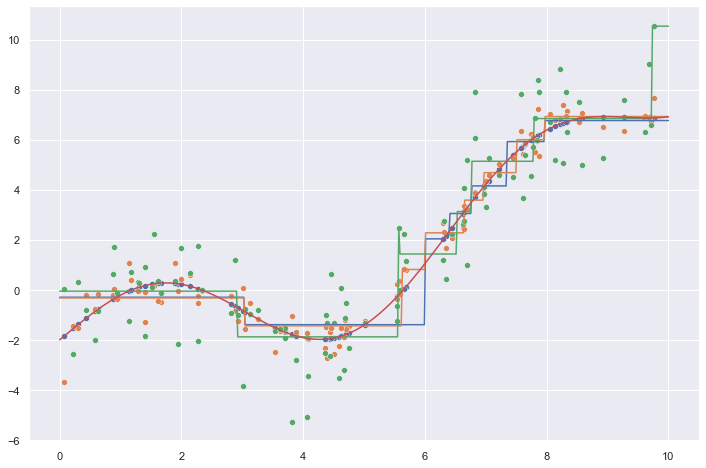


No randomness:      MAE = 0.52, MSE = 0.61, RMSE = 0.78
Some randomness:    MAE = 0.38, MSE = 0.22, RMSE = 0.47
Lots of randomness: MAE = 1.45, MSE = 3.21, RMSE = 1.79


In [86]:
evaluate_regressor(DecisionTreeRegressor, fun, max_depth=3)

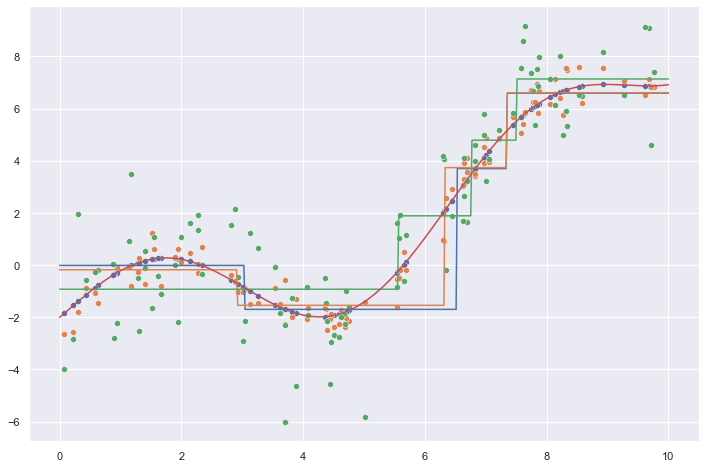


No randomness:      MAE = 0.80, MSE = 1.50, RMSE = 1.22
Some randomness:    MAE = 0.84, MSE = 1.28, RMSE = 1.13
Lots of randomness: MAE = 1.29, MSE = 2.89, RMSE = 1.70


In [87]:
evaluate_regressor(DecisionTreeRegressor, fun, max_depth=2, criterion="absolute_error")

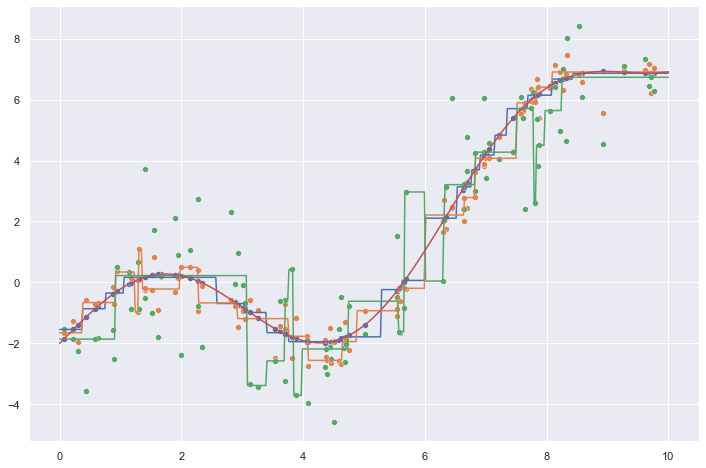


No randomness:      MAE = 0.17, MSE = 0.06, RMSE = 0.25
Some randomness:    MAE = 0.61, MSE = 0.56, RMSE = 0.75
Lots of randomness: MAE = 1.60, MSE = 4.08, RMSE = 2.02


In [88]:
# evaluate_regressor(DecisionTreeRegressor, fun, max_leaf_nodes=20)
evaluate_regressor(DecisionTreeRegressor, fun, max_leaf_nodes=20, criterion="absolute_error")

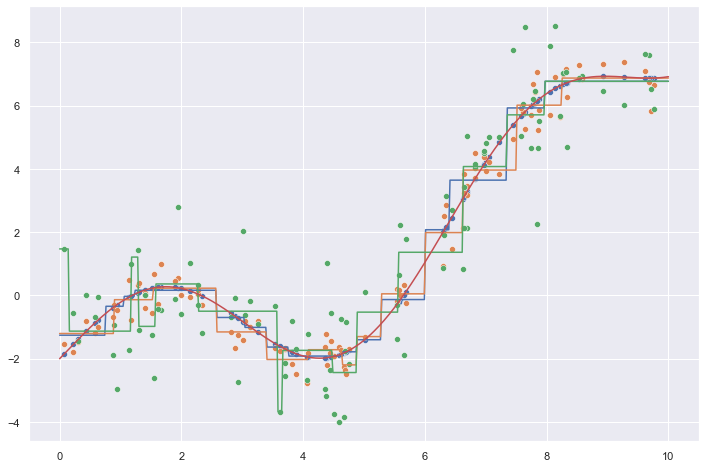


No randomness:      MAE = 0.27, MSE = 0.15, RMSE = 0.39
Some randomness:    MAE = 0.41, MSE = 0.25, RMSE = 0.50
Lots of randomness: MAE = 1.12, MSE = 2.23, RMSE = 1.49


In [89]:
evaluate_regressor(DecisionTreeRegressor, fun, min_samples_split=16)

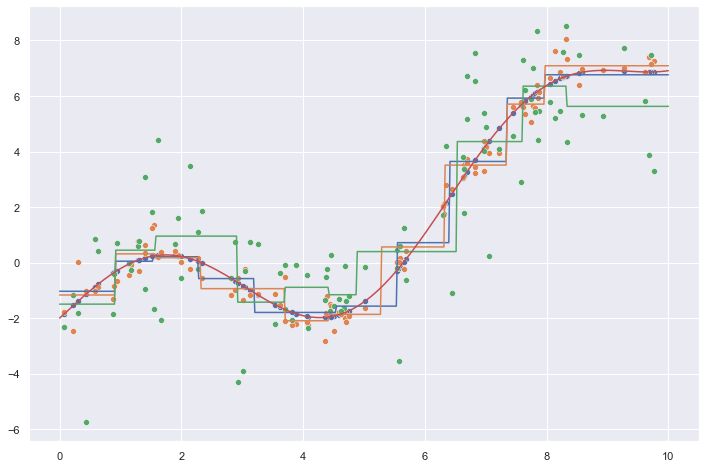


No randomness:      MAE = 0.30, MSE = 0.17, RMSE = 0.42
Some randomness:    MAE = 0.51, MSE = 0.41, RMSE = 0.64
Lots of randomness: MAE = 1.60, MSE = 3.93, RMSE = 1.98


In [90]:
evaluate_regressor(DecisionTreeRegressor, fun, min_samples_leaf=8)